In [2]:
# 调取数据集
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('D:\Python-Excel\Data-analysis\Python-Data-Science\data\marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


默认情况下，Pandas会把时间列加载为Python字符串格式（类型是object）。可以用DataFrame
的dtypes属性查看类型：

In [3]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

写一个把字符串转换成时间类型的函数：

In [4]:
import datetime

def convert_time(s):
    h, m, s = map(int, 
                  s.split(':'))
    
    return datetime.timedelta(hours=h, 
                              minutes=m, 
                              seconds=s)

data = pd.read_csv('D:\Python-Excel\Data-analysis\Python-Data-Science\data\marathon-data.csv', 
                   converters={'split': convert_time, 
                               'final': convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [5]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

为了能使用Seaborn画图，还需要添加一列，将时间换算成秒：

In [6]:
# data['split_sec'] = data['split'].astype(int) / 1E9
# data['final_sec'] = data['final'].astype(int) / 1E9
# data.head()


data['split_sec'] = data['split'].dt.seconds / 1.0
data['final_sec'] = data['final'].dt.seconds / 1.0
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


我们可以通过joinplot函数画图，从而对数据有个认识，示例代码如下：

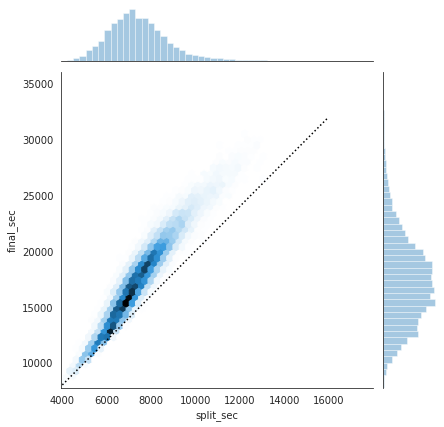

In [7]:
# 马拉松前半程成绩与全程成绩的对比

with sns.axes_style('white'):
    g = sns.jointplot("split_sec", 
                      "final_sec", 
                      data, 
                      kind='hex')
    
    g.ax_joint.plot(np.linspace(4000, 16000), 
                    np.linspace(8000, 32000), ':k')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon.jpg")

创建一列(split_frac, split fraction)来表示前后半程的差异，衡量比赛选手后半程加速或前半程加速的程度

In [8]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


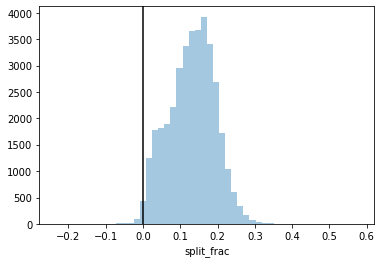

In [9]:
# 前后半程差异系数分布图，0表示前后半程耗时相同
sns.distplot(data['split_frac'], 
             kde=False);

plt.axvline(0, color='k', 
            linestyle="-")

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon1.jpg")

In [11]:
sum(data.split_frac < 0)

251

再来看看前后半程差异系数与其他变量有没有相关性。用一个矩阵图pairgrid画出所有变量间的相关性

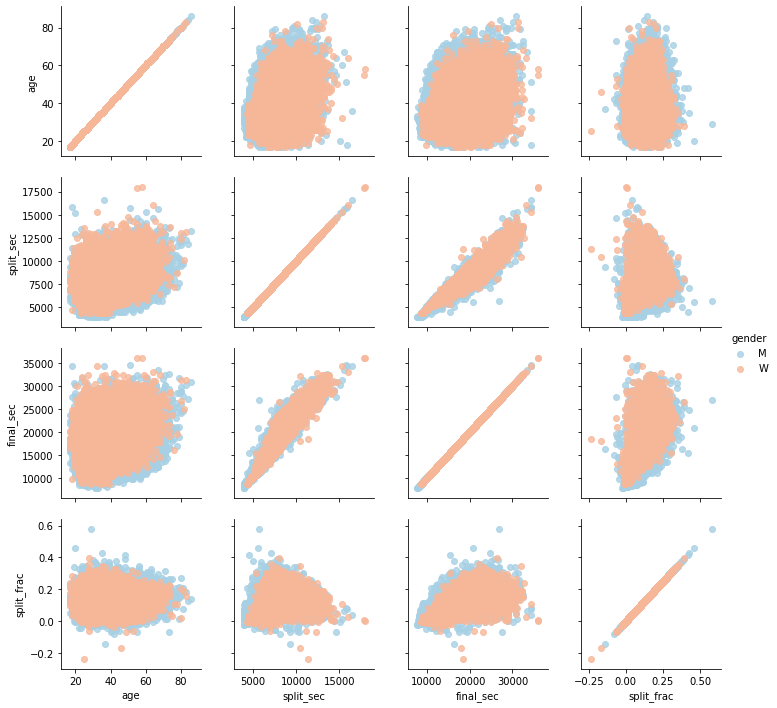

In [10]:
# 马拉松数据集中变量间的相关性
g = sns.PairGrid(data, vars=['age', 
                             'split_sec', 
                             'final_sec', 
                             'split_frac'], 
                 hue='gender', 
                 palette='RdBu_r')

g.map(plt.scatter, 
      alpha=0.8)

g.add_legend()
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon2.jpg")

对比男女选手之间的差异是件有趣的事情。来看这两组选手前后半程差异系数的频次直方图

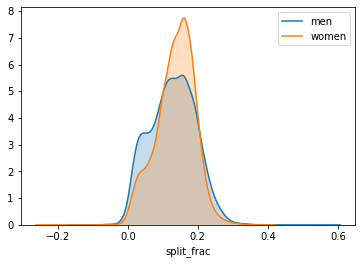

In [11]:
# 男女选手前后半程差异系数分布情况
sns.kdeplot(data.split_frac[data.gender=='M'], 
            label='men', 
            shade=True)

sns.kdeplot(data.split_frac[data.gender=='W'], 
            label='women', 
            shade=True)

plt.xlabel('split_frac')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon3.jpg")

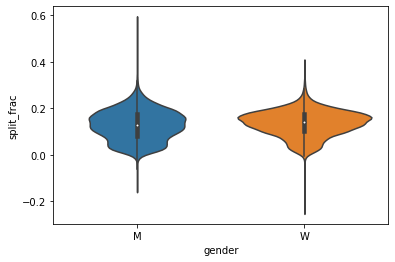

In [12]:
# 用小提琴图（violin plot）对比男女选手前后半程差异系数
sns.violinplot("gender", 
               "split_frac",
               
               data=data,
               
               paletter=["lightblue", 
                         "lightpink"])

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon4.jpg")

让我们再仔细看看这幅图，对比两个由年龄构成函数的小提琴图。在数组中创建一个新列，表示每名选手的年龄段。示例代码如下：

In [14]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


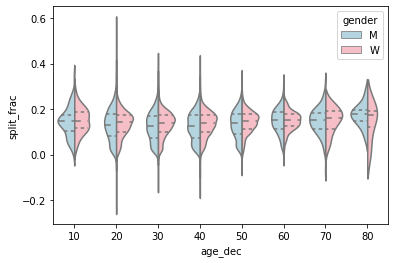

In [15]:
# 用小提琴图表示不同性别、年龄段的前后半程差异系数

men = (data.gender == 'M')
women = (data.gender == "W")

with sns.axes_style(style=None):
    sns.violinplot("age_dec", 
                   "split_frac",
                   hue="gender",
        
                   data=data,
                   
                   split=True,
                   
                   inner="quartile",
                   
                   palette=["lightblue", 
                            "lightpink"])

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon5.jpg")

下面用regplot为数据自动拟合一个线性回归模型

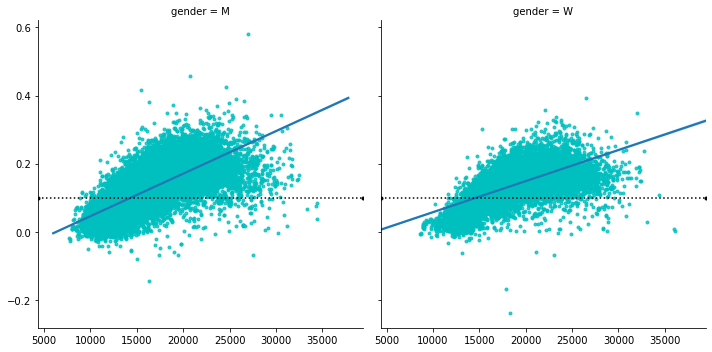

In [16]:
# 男女选手的前后半程差异系数与比赛成绩
g = sns.lmplot('final_sec', 
               'split_frac', 
               
               col='gender',
               
               data=data,
               
               markers= ".",
               
               scatter_kws = dict(color='c'))

g.map(plt.axhline, y=0.1, 
      color="k", ls=":")

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\marathon6.jpg")